In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("electric_production.csv", index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='DATE', length=956, freq=None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 956 entries, 1939-01-01 to 2018-08-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  956 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [5]:
data.columns = ['Energy Production']
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [6]:
data_1985 = data[data.index.year > int(1985)]
data_1985.head()

,Energy Production
DATE,
1986-01-01,73.4956
1986-02-01,68.1637
1986-03-01,62.3923
1986-04-01,57.1915
1986-05-01,55.9599


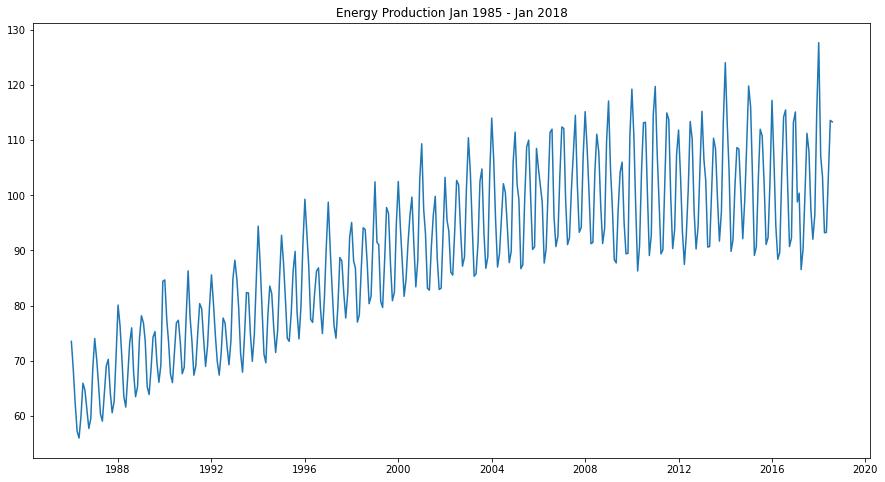

In [7]:
plt.figure(figsize=(15,8))
plt.plot(data_1985)
plt.title("Energy Production Jan 1985 - Jan 2018")
plt.show()

In [8]:
result = seasonal_decompose(data_1985, model="multiplicative")
result

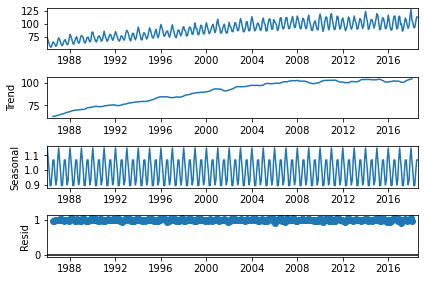

In [9]:
result.plot()
plt.show()

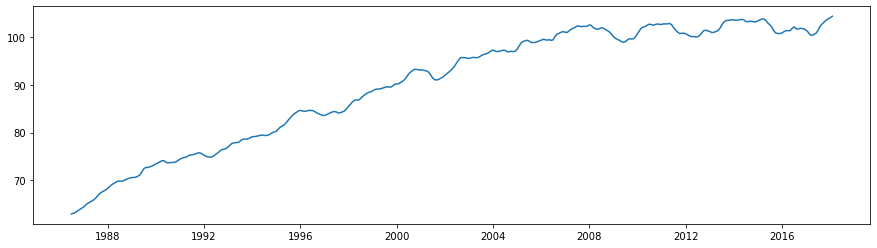

In [10]:
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

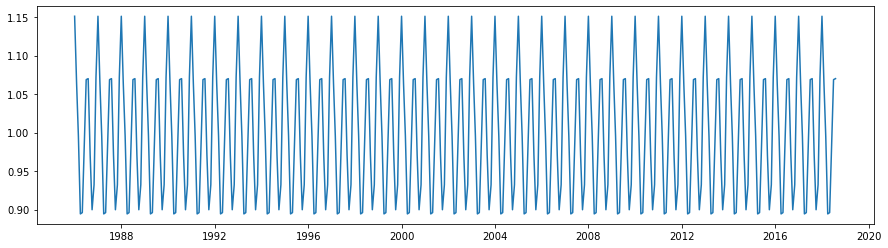

In [11]:
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)  

#Có theo mùa

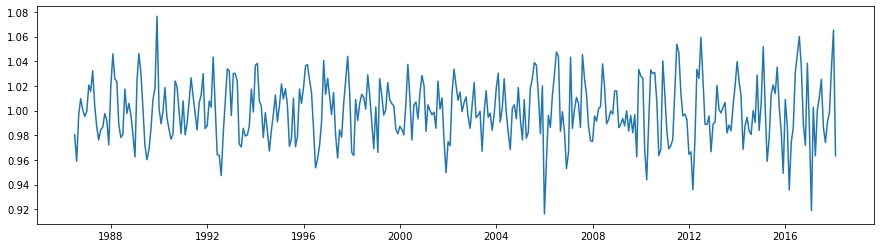

In [12]:
plt.figure(figsize=(15,4))
plt.plot(result.resid)

#Resid: Không ổn định

In [13]:
stepwise_model = auto_arima(data_1985, start_p=2, start_q=2,
                            max_p=5, max_q=5, m=12,
                            start_P=1, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1778.415, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2001.096, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1928.043, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1825.741, Time=0.24 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1777.872, Time=0.83 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1901.944, Time=0.46 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1777.527, Time=2.35 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1776.366, Time=2.71 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1764.457, Time=3.81 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1767.947, Time=2.39 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1763.244, Time=2.65 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1775.817, Time=1.94 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1766.971, Time=1.66 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1778.118, Time=0.78 sec
 ARIMA(0,1,2)(2,1,2

In [14]:
stepwise_model.aic()

1761.527774674908

In [15]:
train = data.loc['1985-01-01':'2015-01-01'] # 1/1985 -> 12/2014
test = data.loc['2015-01-01':]

In [16]:
test.head()

,Energy Production
DATE,
2015-01-01,119.8260
2015-02-01,116.0253
2015-03-01,103.9265
2015-04-01,89.0847
2015-05-01,90.6408


In [17]:
len(test) #số mẫu trong test

44

In [18]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
future_forcast = stepwise_model.predict(n_periods=len(test)) # Số khoảng thời gian cần dự đoán
future_forcast

array([109.60539924, 100.70626997,  89.71136107,  92.06894672,
       103.0375391 , 112.17579639, 111.30475971, 100.01379931,
        91.66410784,  96.12872194, 110.27753768, 118.76801793,
       108.64361993, 100.21333036,  89.93911828,  92.28891472,
       103.14679997, 113.09871333, 111.66337223,  99.99295197,
        91.75643705,  96.1008396 , 110.79629532, 119.35702616,
       109.05569576, 101.07552478,  90.27863182,  92.55439535,
       103.04898506, 112.8939981 , 111.30885852, 100.28327839,
        92.1216247 ,  97.0396631 , 110.92734526, 120.15301975,
       109.73004931, 101.87582964,  90.60725283,  92.84447217,
       103.16855092, 112.74570147, 111.22367673, 100.64891577])

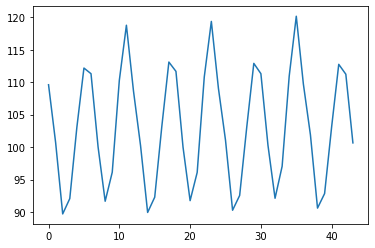

In [21]:
plt.plot(future_forcast)

In [24]:
future_forcast_dataframe = pd.DataFrame(future_forcast, index= test.index, columns=['Prediction'])
future_forcast_dataframe.head()

,Prediction
DATE,
2015-01-01,109.605399
2015-02-01,100.706270
2015-03-01,89.711361
2015-04-01,92.068947
2015-05-01,103.037539


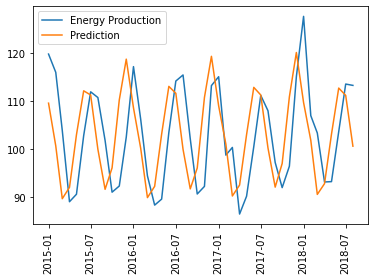

In [25]:
plt.plot(test, label="Energy Production")
plt.plot(future_forcast_dataframe, label="Prediction")
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

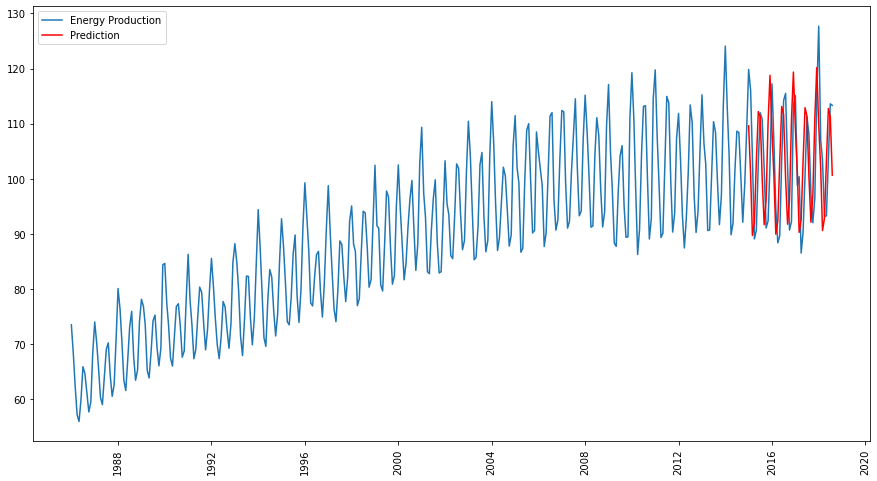

In [29]:
plt.figure(figsize=(15,8))
plt.plot(data_1985, label="Energy Production")
plt.plot(future_forcast_dataframe, label="Prediction", color="red")
plt.xticks(rotation="vertical")
plt.legend()
plt.show()

In [31]:
mae = mean_absolute_error(test, future_forcast_dataframe[0:len(test)])
mse = mean_squared_error(test, future_forcast_dataframe[0:len(test)])

In [32]:
print(mae)
print(mse)

8.801487206713581
102.4378022084643


In [33]:
future_forcast_2 = stepwise_model.predict(n_periods=len(test) + 12) # 44 + 12 tháng cần dự đoán
future_forcast_2

array([109.60539924, 100.70626997,  89.71136107,  92.06894672,
       103.0375391 , 112.17579639, 111.30475971, 100.01379931,
        91.66410784,  96.12872194, 110.27753768, 118.76801793,
       108.64361993, 100.21333036,  89.93911828,  92.28891472,
       103.14679997, 113.09871333, 111.66337223,  99.99295197,
        91.75643705,  96.1008396 , 110.79629532, 119.35702616,
       109.05569576, 101.07552478,  90.27863182,  92.55439535,
       103.04898506, 112.8939981 , 111.30885852, 100.28327839,
        92.1216247 ,  97.0396631 , 110.92734526, 120.15301975,
       109.73004931, 101.87582964,  90.60725283,  92.84447217,
       103.16855092, 112.74570147, 111.22367673, 100.64891577,
        92.49915243,  97.76231789, 111.06692961, 120.63874841,
       110.19466605, 102.29364374,  90.90116452,  93.13631634,
       103.46045579, 112.91838711, 111.46946791, 100.97575598])

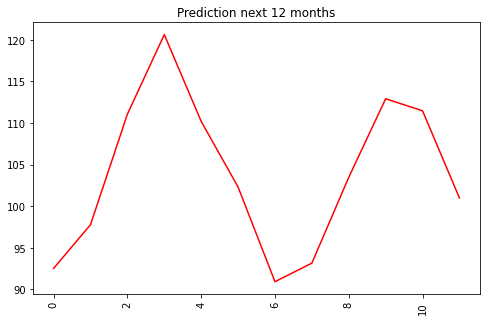

In [34]:
plt.figure(figsize=(8,5))
plt.plot(future_forcast_2[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 12 months")
plt.show()

In [36]:
future_forcast_2[len(test):]

array([ 92.49915243,  97.76231789, 111.06692961, 120.63874841,
       110.19466605, 102.29364374,  90.90116452,  93.13631634,
       103.46045579, 112.91838711, 111.46946791, 100.97575598])

In [44]:
months = pd.date_range('2018-09-01', '2019-08-01', freq='MS').strftime("%Y-%m-%d").tolist()

In [45]:
months

['2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-06-01',
 '2019-07-01',
 '2019-08-01']

In [46]:
future_forcast_2[len(test):]

array([ 92.49915243,  97.76231789, 111.06692961, 120.63874841,
       110.19466605, 102.29364374,  90.90116452,  93.13631634,
       103.46045579, 112.91838711, 111.46946791, 100.97575598])

In [47]:
new_predict = pd.DataFrame({
    'DATE': months,
    'Energy_production': future_forcast_2[len(test):]
})
new_predict

,DATE,Energy_production
0,2018-09-01,92.499152
1,2018-10-01,97.762318
2,2018-11-01,111.066930
3,2018-12-01,120.638748
4,2019-01-01,110.194666
5,2019-02-01,102.293644
6,2019-03-01,90.901165
7,2019-04-01,93.136316
8,2019-05-01,103.460456
9,2019-06-01,112.918387
